In [53]:
#data analysis
import pandas as pd

#visualize data
import plotly.express as pe

#split data
from sklearn.model_selection import train_test_split

#model
from sklearn.tree import DecisionTreeClassifier

#evaluate
from sklearn.metrics import confusion_matrix, classification_report

#preprocessing

from sklearn.preprocessing import StandardScaler, LabelEncoder


### objective: predict whether a loan application is to be accepted or rejected

## step 1: Source the data

In [54]:
path = r"C:\Users\harsh\Desktop\NPCI-Python-ML\datasets\Balanced_credit_Risk.txt"

balanced_credit_df = pd.read_csv(path)

balanced_credit_df = balanced_credit_df.drop(columns=["Unnamed: 0", "index"])

balanced_credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12401,30,102540,MORTGAGE,6.0,HOMEIMPROVEMENT,A,1500,7.90,0,0.01,N,5
12402,24,60000,RENT,0.0,PERSONAL,B,12000,12.21,0,0.20,N,2
12403,22,40000,RENT,0.0,EDUCATION,C,6000,12.87,0,0.15,Y,3
12404,22,50000,RENT,2.0,PERSONAL,C,8000,13.16,0,0.16,Y,2


### step 2: Data exploration & pre-processing

In [55]:
print(f"Shape of my table is: {balanced_credit_df.shape}")
print(f"List of columns is: {balanced_credit_df.columns}")
print(f"Current index is: {balanced_credit_df.index}")


Shape of my table is: (12406, 12)
List of columns is: Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
Current index is: RangeIndex(start=0, stop=12406, step=1)


In [56]:
print(f"Number of unique values per column:\n{balanced_credit_df.nunique()}")

Number of unique values per column:
person_age                      50
person_income                 2184
person_home_ownership            4
person_emp_length               33
loan_intent                      6
loan_grade                       7
loan_amnt                      576
loan_int_rate                  340
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64


In [57]:
print(f"Info of the table: {balanced_credit_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12406 entries, 0 to 12405
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  12406 non-null  int64  
 1   person_income               12406 non-null  int64  
 2   person_home_ownership       12406 non-null  object 
 3   person_emp_length           12406 non-null  float64
 4   loan_intent                 12406 non-null  object 
 5   loan_grade                  12406 non-null  object 
 6   loan_amnt                   12406 non-null  int64  
 7   loan_int_rate               12406 non-null  float64
 8   loan_status                 12406 non-null  int64  
 9   loan_percent_income         12406 non-null  float64
 10  cb_person_default_on_file   12406 non-null  object 
 11  cb_person_cred_hist_length  12406 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.1+ MB
Info of the table: None


In [58]:
categorical_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
real_value_features = [col for col in balanced_credit_df.columns if col not in categorical_features and col != "loan_status"]


In [59]:
balanced_credit_df[       real_value_features    ].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,12406.000000,1.240600e+04,12406.000000,12406.000000,12406.000000,12406.000000,12406.000000
mean,27.594470,6.040450e+04,4.555054,10187.790182,11.784964,0.197573,5.744720
std,6.247178,4.454757e+04,4.230786,6692.722063,3.391123,0.121986,4.081106
min,20.000000,4.000000e+03,0.000000,800.000000,5.420000,0.000000,2.000000
25%,23.000000,3.461550e+04,2.000000,5000.000000,8.940000,0.100000,3.000000
50%,26.000000,5.091500e+04,4.000000,8800.000000,11.830000,0.170000,4.000000
75%,30.000000,7.300000e+04,7.000000,14000.000000,14.420000,0.280000,8.000000
max,144.000000,1.362000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000



v1 : 40 : 5 units below average

average : 45 0 units differing from average


v2 : 510 : 465 units above average

In [60]:
for col in real_value_features:
    display(     pe.box(y=col, data_frame=balanced_credit_df)     )

In [61]:
balanced_credit_df[       categorical_features      ].describe(  include="object"  )

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,12406,12406,12406,12406
unique,4,6,7,2
top,RENT,MEDICAL,B,N
freq,7299,2480,3550,9585


In [62]:
for col in categorical_features:
    
 
    fig = pe.histogram(
        x=col,  #data to be used on x axis
        data_frame=balanced_credit_df, #source of data
        barmode="stack",  #style of histogram
        color=balanced_credit_df[col] #coloring criteria (based on values of the current column)
    )

    
    display( fig )

In [63]:
balanced_credit_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### scaling and encoding

In [64]:
sc = StandardScaler()

le = LabelEncoder()

#apply standard scalar and overwrite original unscaled real column values
balanced_credit_df[  real_value_features  ]  =  sc.fit_transform(  balanced_credit_df[real_value_features]  )

#for any col that is in the list of categorical_features
for col in categorical_features:

    #apply encoding technique on the values of the column & overwrite original values in the table
    balanced_credit_df[col] = le.fit_transform(balanced_credit_df[col])



In [65]:
balanced_credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.895556,-0.031529,3,27.997097,4,3,3.707491,1.248910,1,3.217111,1,-0.672570
1,-0.415320,-1.140501,0,-0.840316,3,2,-0.700459,0.319977,1,3.053151,0,-0.672570
2,-0.735477,0.114388,3,-0.131199,3,2,3.707491,1.015939,1,2.725232,0,-0.917612
3,-0.575398,-0.134794,3,0.814290,3,2,3.707491,0.732836,1,2.889191,1,-0.427529
4,-1.055634,-1.133766,2,-0.603944,5,0,-1.148725,-1.369797,1,0.429796,0,-0.917612
...,...,...,...,...,...,...,...,...,...,...,...,...
12401,0.385074,0.945892,0,0.341545,2,0,-1.298147,-1.145674,0,-1.537720,0,-0.182487
12402,-0.575398,-0.009081,3,-1.076688,4,1,0.270784,0.125343,0,0.019897,0,-0.917612
12403,-0.895556,-0.458057,3,-1.076688,1,2,-0.625748,0.319977,0,-0.390002,1,-0.672570
12404,-0.895556,-0.233569,3,-0.603944,4,2,-0.326904,0.405497,0,-0.308022,1,-0.917612


In [66]:
balanced_credit_df[    ["loan_status"]    ].value_counts(normalize=True) *100

loan_status
0              50.0
1              50.0
dtype: float64

## step 3: selection of features of target!

In [67]:
features = categorical_features + real_value_features

target = "loan_status"

In [68]:
x_train, x_test, y_train, y_test=train_test_split( 
    balanced_credit_df[features], #feature column values from the data frame
    balanced_credit_df[target],  #target column values from the data frame
    test_size=0.2,  #size for testing data
    stratify=balanced_credit_df[target], #IN WHAT RATIO SAMPLES MUST BE STRATIFIED?
    random_state=42   #seed value for randomization 
    )


print(f"split in training data:  {y_train.value_counts()} ")
print(f"split in testing data:  {y_test.value_counts()} ")

split in training data:  1    4962
0    4962
Name: loan_status, dtype: int64 
split in testing data:  0    1241
1    1241
Name: loan_status, dtype: int64 


### step 5 : train the model

In [69]:
clf = DecisionTreeClassifier()

clf.fit( x_train, y_train     )

DecisionTreeClassifier()

### step 6 : evaluation of the model

In [70]:
predicted_values = clf.predict(  x_test  )

Model Ans        Actual Ans  Name
0                   0          TRUE NEGATIVE
0                   1          FALSE NEGATIVE  
1                   0          FALSE POSITIVE



 TP   FP
[983 258]

 FN   TN
 [265 976



In [84]:
ans = {}

for name, value in zip(features,clf.feature_importances_):
    
    ans[name] = value


result = pd.DataFrame(ans, index=["Gini Impurity"]).T.sort_values(by="Gini Impurity")

display(result)


pe.bar(   data_frame = result  )

,Gini Impurity
cb_person_default_on_file,0.005785
cb_person_cred_hist_length,0.034144
person_age,0.041129
loan_amnt,0.046408
person_emp_length,0.053349
person_home_ownership,0.058472
loan_intent,0.069101
loan_int_rate,0.083309
person_income,0.175879
loan_grade,0.180862


In [44]:
help(   confusion_matrix      )

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [45]:
print(   confusion_matrix( y_true=y_test, y_pred=predicted_values, labels=[1,0]  )   )

[[1038  203]
 [ 246  995]]


In [46]:
print(   classification_report( y_true=y_test, y_pred=predicted_values  )   )

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1241
           1       0.81      0.84      0.82      1241

    accuracy                           0.82      2482
   macro avg       0.82      0.82      0.82      2482
weighted avg       0.82      0.82      0.82      2482



### Out of all cases reported as 1, how many are actually 1???
    TP           = 983
    ----------    -----
        TP + FP     983 + 258


### Out of all cases reported as 0, how many are actually 0???

            TN
            ------
            TN + FN



### Out of all cases THAT SHOULD BE 1, how many are actually reported as 1?


    TP
    -----
    TP + FN



### Out of all cases THAT SHOULD BE 0, how many are actually reported as 0?

    TN
   -----
    TN + FP

### What can you do if observed performance is not up to expectations????

### 1) Check if the right algorithm was used!!! 

### 2) HAVE WE SELECTED ALL RELEVANT FEATURES? CAN WE NEW ENGINEER NEW FEATURES???


### 3) HAVE WE CONDUCTED TRAINING & EVALUATION CORRECTLY?

### 4) HAVE WE TUNED THE MODEL???

In [47]:
from sklearn import tree

                        
text_representation = tree.export_text(clf)


print(text_representation)

|--- feature_2 <= 2.50
|   |--- feature_9 <= 0.88
|   |   |--- feature_5 <= -0.91
|   |   |   |--- feature_9 <= -0.35
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- feature_4 <= 0.14
|   |   |   |   |   |   |--- feature_8 <= -0.38
|   |   |   |   |   |   |   |--- feature_6 <= -0.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  -0.25
|   |   |   |   |   |   |   |   |--- feature_10 <= -0.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_10 >  -0.55
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_8 >  -0.38
|   |   |   |   |   |   |   |--- feature_10 <= -0.80
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_10 >  -0.80
|   |   |   |   |   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   | 

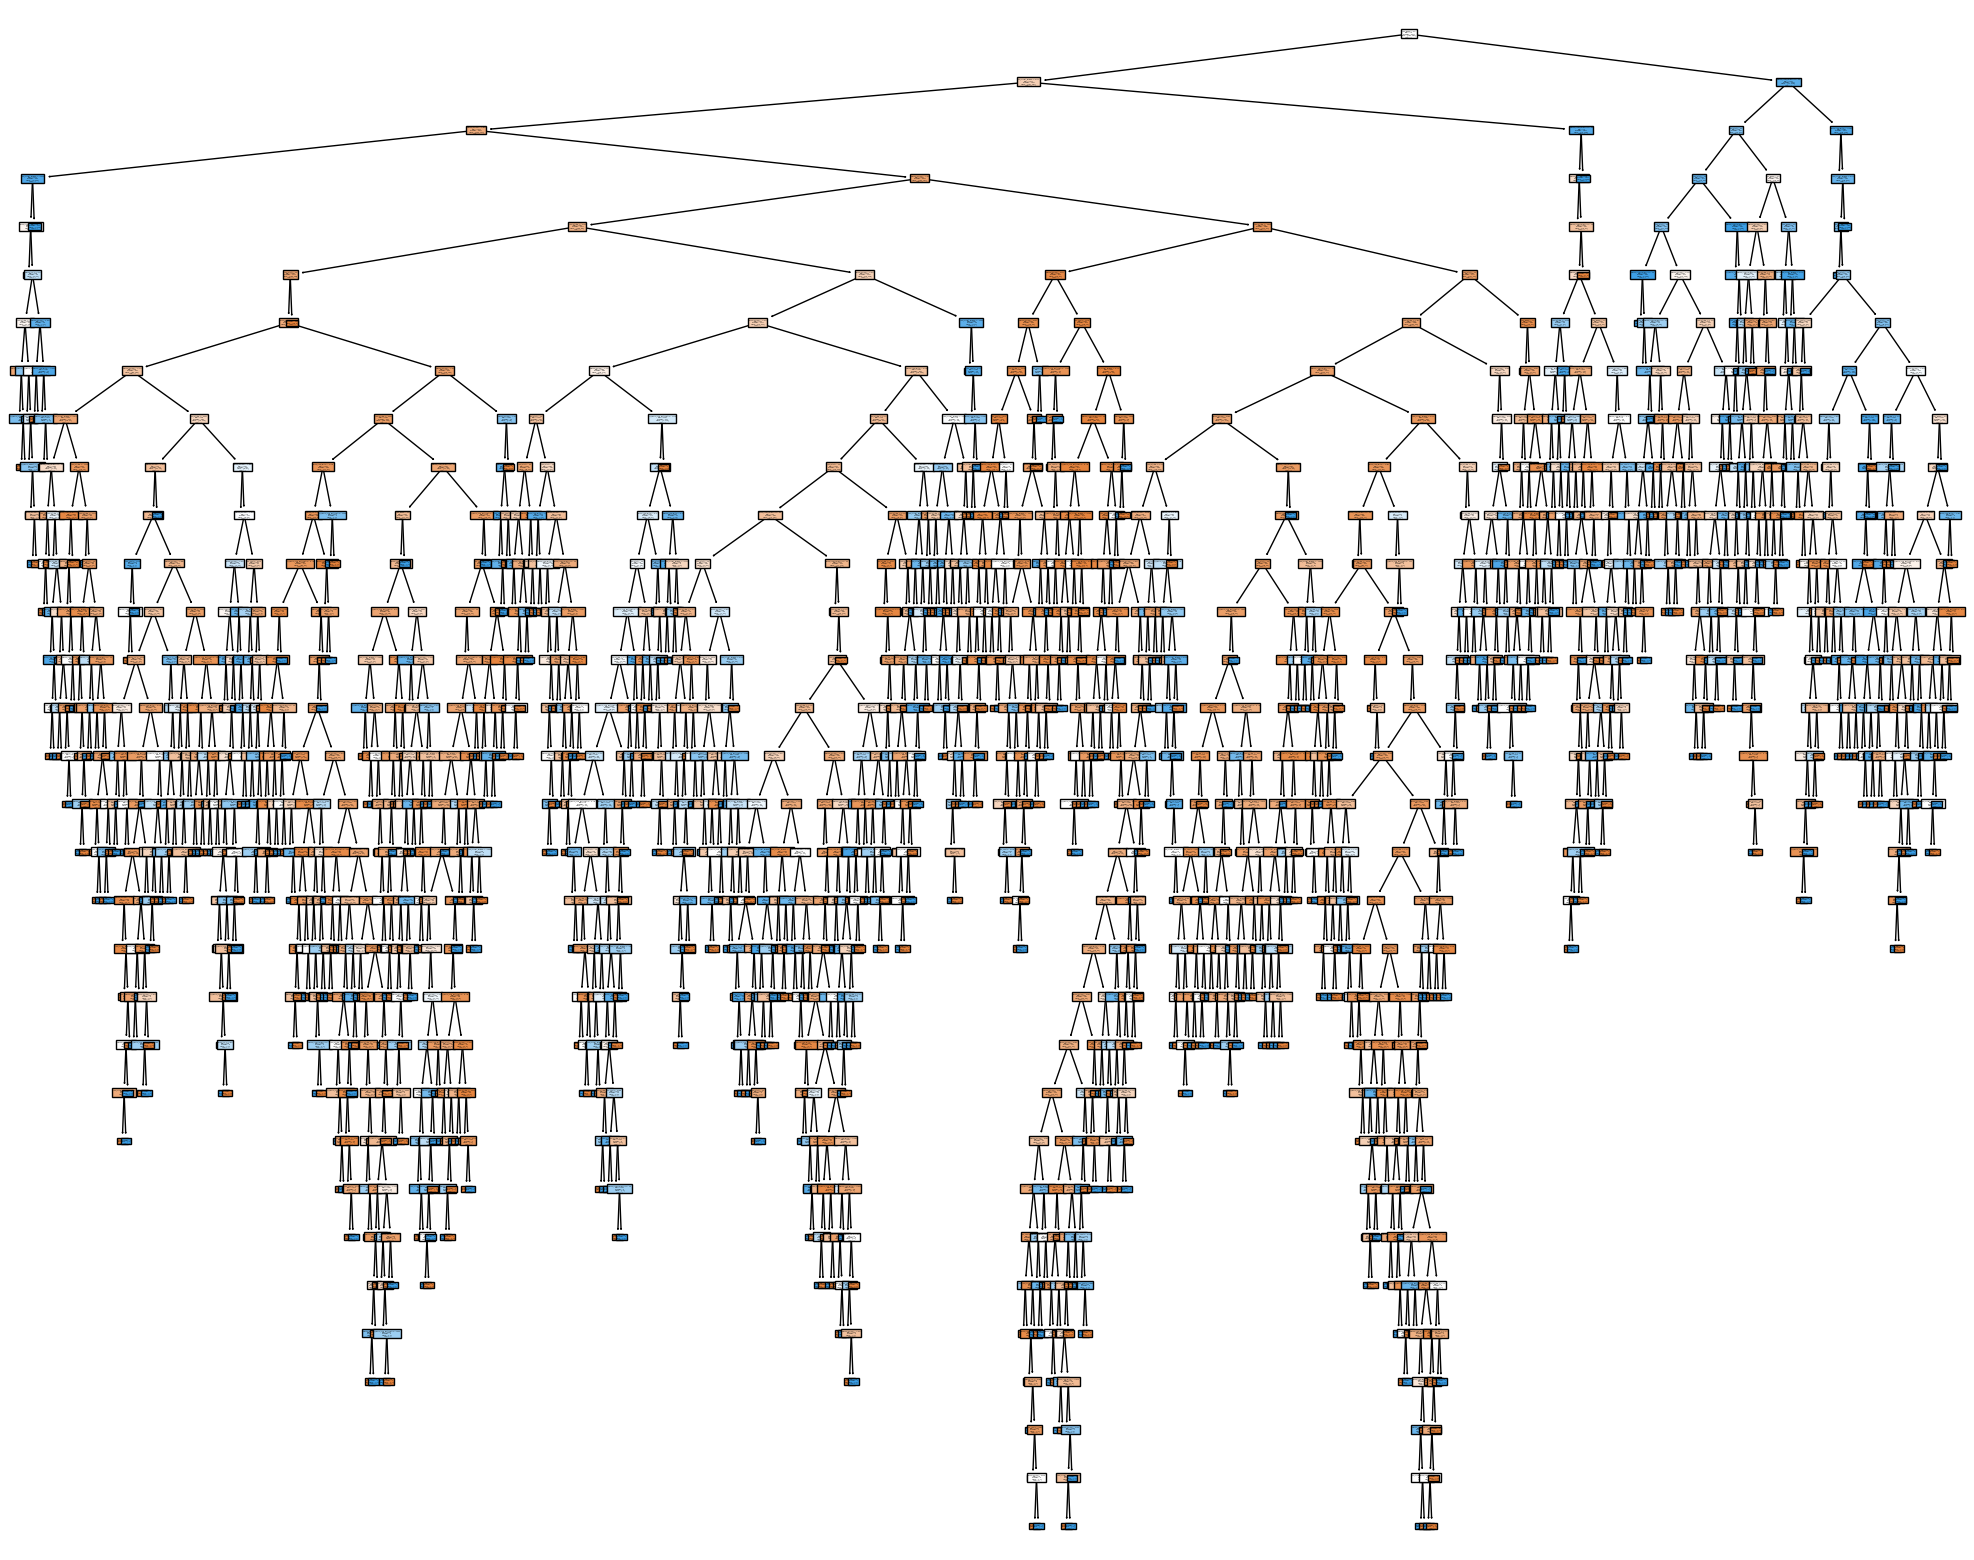

In [52]:
import matplotlib.pyplot as plt 

#create a canvas size (height and width)
fig = plt.figure(figsize=(25,20))



_ = tree.plot_tree(clf, #my trained model
                   feature_names=features, #name of features  
                   class_names=["0","1"], #name of categories in target column
                   filled=True)

In [50]:
import dtreeviz # remember to load the package

viz = dtreeviz.model(clf, x_train, y_train,
                target_name="loan_status",
                feature_names=features,
                class_names=target
                )

v=viz.view()       # in notebook, displays inline


v.save("dtree.svg")

c:\Users\harsh\Desktop\NPCI-Python-ML\virtual_setup\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

8779092028